In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt

In [2]:
sheets_dict = pd.read_excel('RTM_prices.xlsx', sheet_name=None)

prices_df = pd.DataFrame()
for name, sheet in sheets_dict.items():
    sheet['Month'] = name
    month = sheet.rename(columns=lambda x: x.split('\n')[-1])
    prices_df = prices_df.append(month)

prices_df.reset_index(inplace=True, drop=True)

In [3]:
print(prices_df.shape)
prices_df.tail()

(267077, 8)


,Delivery Date,Delivery Hour,Delivery Interval,Repeated Hour Flag,Settlement Point Name,Settlement Point Type,Settlement Point Price,Month
267072,05/01/2021,24,3,N,LZ_WEST,LZEW,18.78,May
267073,05/01/2021,24,3,N,LZ_WEST,LZ,18.78,May
267074,05/01/2021,24,4,N,LZ_WEST,LZ,18.43,May
267075,05/01/2021,24,4,N,LZ_WEST,LZEW,18.43,May
267076,2021-05-02 00:00:00,NaN,NaN,10,NaN,08:03:13,NaN,Oct


In [4]:
hourly_load_df = pd.read_excel('hourly_load.xlsx')

print(hourly_load_df.shape)
hourly_load_df.head()

(2159, 12)


,Date,Hour Ending,Hour Interval,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2021-01-01,01:00:00,1,11047.018793,1517.435253,3978.220628,838.352810,13575.277728,3545.093310,7778.262533,1440.188560,43719.849616
1,2021-01-01,02:00:00,2,10954.470339,1523.683893,3975.757045,825.123437,13340.337915,3586.547882,7693.744119,1421.385715,43321.050347
2,2021-01-01,03:00:00,3,10883.657240,1519.800916,3969.812081,819.551228,13311.625189,3586.124059,7566.951524,1405.544826,43063.067063
3,2021-01-01,04:00:00,4,10926.482445,1523.472963,3983.487761,820.612439,13356.442066,3570.592369,7506.685527,1402.283632,43090.059203
4,2021-01-01,05:00:00,5,11019.796399,1565.625573,3980.940744,831.607158,13528.651487,3590.902242,7563.971854,1405.094618,43486.590073


In [5]:
generation_df = pd.read_excel('RT_Generation.xlsx')

print(generation_df.shape)
generation_df.head()

(810, 100)


,Date,Fuel,Settlement Type,Total,0:15,0:30,0:45,1:00,1:15,1:30,1:45,2:00,2:15,2:30,2:45,3:00,3:15,3:30,3:45,4:00,4:15,4:30,4:45,5:00,5:15,5:30,5:45,6:00,6:15,6:30,6:45,7:00,7:15,7:30,7:45,8:00,8:15,8:30,8:45,9:00,9:15,9:30,9:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,12:00,12:15,12:30,12:45,13:00,13:15,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,0:00
0,2021-01-01,Biomass,FINAL,704.718604,7.411995,7.406062,7.412330,7.411520,7.412624,7.413291,7.414797,7.412481,7.413242,7.423830,7.407722,7.421340,7.419004,7.413664,7.416558,7.421234,7.414332,7.419658,7.415603,7.413975,7.164380,7.029791,7.039068,7.296376,7.412736,7.421351,7.410899,7.415952,7.415174,7.415856,7.417565,7.415540,7.414238,7.417123,7.418592,7.417860,7.403535,7.410477,7.411185,7.402382,7.405985,7.401941,7.403941,7.409941,7.409336,7.416701,7.408491,7.409546,7.410379,7.409837,7.415569,7.406700,7.311304,7.031186,7.026665,7.033915,7.069447,7.384680,7.415271,7.403396,7.411466,7.400837,7.412809,7.402765,7.410712,7.413594,7.403644,7.402985,7.404345,7.399120,7.401736,7.394268,7.397906,7.396439,7.031423,7.010770,7.022318,7.014497,6.782650,6.869875,7.393912,7.394420,7.352730,7.349335,7.366632,7.345729,7.345063,7.352867,7.346401,7.204626,6.994781,7.274248,7.397511,7.392862,7.395558,7.398197
1,2021-01-01,Coal,FINAL,209114.074688,1562.671544,1569.063113,1550.287075,1544.381811,1550.812567,1552.157660,1536.286019,1526.983478,1529.342569,1528.708089,1524.636562,1520.757113,1531.013304,1552.654808,1567.421593,1585.132031,1667.372186,1687.665979,1706.533346,1758.003328,1833.375116,1938.799453,1959.127891,1972.186451,2033.223878,2095.779426,2133.847502,2141.191365,2179.417187,2194.383047,2220.258751,2270.037278,2287.503246,2274.646821,2219.195866,2165.187230,2127.813362,2032.708969,1947.034206,1868.907211,1808.301841,1753.416727,1715.118542,1666.916611,1659.310452,1658.110210,1668.825357,1692.448650,1689.393712,1746.902075,1780.190560,1795.486127,1807.748545,1814.789482,1815.664080,1833.838217,1874.872661,1901.085455,1938.953307,1999.357005,2012.695618,2033.781880,2067.216888,2162.891398,2271.288778,2376.067529,2540.738585,2673.104400,2736.212861,2862.165316,2950.836168,2996.738172,3017.034016,3037.277687,3039.100977,3035.595983,3027.456023,2999.553948,2993.704191,2995.371674,3004.193094,3010.181083,3001.394008,2999.700858,3006.981046,3003.230119,2985.433370,2975.523727,2981.958624,2929.756226,2828.359991,2752.276793,2706.544582,2690.365878,2683.707675,2658.397475
2,2021-01-01,Gas,FINAL,36927.542196,322.166053,311.591247,314.881020,315.973877,327.020826,335.706445,337.172262,337.068045,340.157651,348.661088,338.923212,341.566785,345.998118,345.251989,340.803526,338.462896,339.795296,339.302475,334.411644,329.953978,353.931410,369.726057,377.223749,398.826230,412.666809,414.200937,416.287573,418.592462,419.030326,419.590717,419.862084,415.476330,414.098462,416.627209,422.536406,422.191154,413.914912,412.008177,407.574867,417.381576,401.765545,399.533289,394.544249,391.240752,378.134048,373.352069,371.975077,369.245292,363.608034,354.807870,350.759315,347.188058,346.248068,344.517269,344.124116,347.270993,344.417189,342.739884,345.337395,342.127422,343.466904,340.549293,340.876136,339.343615,347.597341,352.022472,350.366436,380.383346,427.283136,432.578603,441.731006,465.654719,470.234237,488.799038,462.964426,450.293389,490.066321,516.671788,517.339348,515.065990,503.840591,497.346772,482.518748,481.409451,459.941061,459.793689,445.510766,397.195366,366.944189,355.220027,355.129441,355.569998,354.866419,314.389883,267.579114,257.447323
3,2021-01-01,Gas-CC,FINAL,464762.485813,4320.059659,4234.444620,4205.231653,4187.540619,4162.543282,4094.140815,4039.391556,4038.805135,4022.934880,4031.249891,4028.382225,4023.409976,4096.554515,4203.679716,4290.697513,4326.695469,4402.143300,441

In [26]:
ORDC_df = pd.read_excel('RT_ORDC_prices.xlsx')

print(ORDC_df.shape)
ORDC_df

(11612, 7)


,DeliveryDate,DeliveryHour,DeliveryInterval,RepeatedHourFlag,RTRSVPOR,RTRSVPOFF,RTRDP
0,2021-01-01,1,1,N,0.0,0.0,0.0
1,2021-01-01,1,2,N,0.0,0.0,0.0
2,2021-01-01,1,3,N,0.0,0.0,0.0
3,2021-01-01,1,4,N,0.0,0.0,0.0
4,2021-01-01,2,1,N,0.0,0.0,0.0
...,...,...,...,...,...,...,...
11607,2021-05-01,23,4,N,0.0,0.0,0.0
11608,2021-05-01,24,1,N,0.0,0.0,0.0
11609,2021-05-01,24,2,N,0.0,0.0,0.0
11610,2021-05-01,24,3,N,0.0,0.0,0.0


In [27]:
ORDC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11612 entries, 0 to 11611
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DeliveryDate      11612 non-null  datetime64[ns]
 1   DeliveryHour      11612 non-null  int64         
 2   DeliveryInterval  11612 non-null  int64         
 3   RepeatedHourFlag  11612 non-null  object        
 4   RTRSVPOR          11612 non-null  float64       
 5   RTRSVPOFF         11612 non-null  float64       
 6   RTRDP             11612 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 635.2+ KB


In [28]:
priceAdder_dict = pd.read_excel('RT_PriceAdders.xlsx', sheet_name=None)

price_adder_df = pd.DataFrame()
for name, sheet in priceAdder_dict.items():
    sheet['Month'] = name
    month = sheet.rename(columns=lambda x: x.split('\n')[-1])
    price_adder_df = price_adder_df.append(month)

price_adder_df.reset_index(inplace=True, drop=True)

In [30]:
price_adder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35694 entries, 0 to 35693
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Batch ID                    35694 non-null  int64         
 1         SCED Timestamp        35694 non-null  datetime64[ns]
 2   Repeated Hour Flag          35694 non-null  object        
 3   System Lamda                35694 non-null  float64       
 4   PRC                         35694 non-null  float64       
 5   RTOLCAP                     35694 non-null  float64       
 6   RTOFFCAP                    35694 non-null  float64       
 7   RTORPA                      35694 non-null  float64       
 8   RTOFFPA                     35694 non-null  float64       
 9   RTOLHSL                     35694 non-null  float64       
 10  RTBP                        35694 non-null  float64       
 11  RTOLNSRS                    35694 non-null  float64   

In [33]:
print(hourly_load_df.shape)
print(generation_df.shape)
print(ORDC_df.shape)
print(price_adder_df.shape)
print(prices_df.shape)

(2159, 12)
(810, 100)
(11612, 7)
(35694, 33)
(267077, 8)


In [37]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267077 entries, 0 to 267076
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Delivery Date           267077 non-null  object 
 1   Delivery Hour           267076 non-null  object 
 2   Delivery Interval       267076 non-null  object 
 3   Repeated Hour Flag      267077 non-null  object 
 4   Settlement Point Name   267076 non-null  object 
 5   Settlement Point Type   267077 non-null  object 
 6   Settlement Point Price  267076 non-null  float64
 7   Month                   267077 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.3+ MB


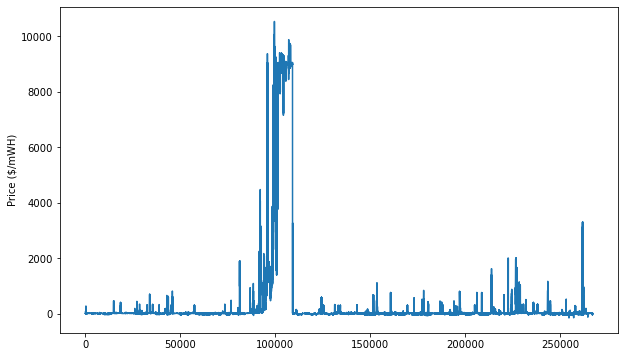

In [62]:
plt.figure(figsize=(10,6))

plt.plot(prices_df['Settlement Point Price'])

plt.ylabel('Price ($/mWH)')

plt.show()

In [40]:
hourly_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2159 non-null   datetime64[ns]
 1   Hour Ending    2159 non-null   object        
 2   Hour Interval  2159 non-null   int64         
 3   COAST          2159 non-null   float64       
 4   EAST           2159 non-null   float64       
 5   FWEST          2159 non-null   float64       
 6   NORTH          2159 non-null   float64       
 7   NCENT          2159 non-null   float64       
 8   SOUTH          2159 non-null   float64       
 9   SCENT          2159 non-null   float64       
 10  WEST           2159 non-null   float64       
 11  ERCOT          2159 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 202.5+ KB


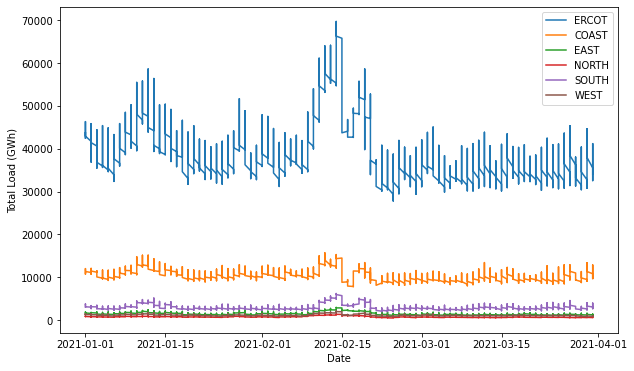

In [65]:
plt.figure(figsize=(10,6))

plt.plot(hourly_load_df['Date'], hourly_load_df[['ERCOT', 'COAST', 'EAST', 'NORTH', 'SOUTH', 'WEST']])

plt.legend(labels=hourly_load_df[['ERCOT', 'COAST', 'EAST', 'NORTH', 'SOUTH', 'WEST']])
plt.ylabel('Total Load (GWh)')
plt.xlabel('Date')

plt.show()

In [42]:
generation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 100 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             810 non-null    datetime64[ns]
 1   Fuel             810 non-null    object        
 2   Settlement Type  810 non-null    object        
 3   Total            810 non-null    float64       
 4   0:15             810 non-null    float64       
 5   0:30             810 non-null    float64       
 6   0:45             810 non-null    float64       
 7   1:00             810 non-null    float64       
 8   1:15             810 non-null    float64       
 9   1:30             810 non-null    float64       
 10  1:45             810 non-null    float64       
 11  2:00             810 non-null    float64       
 12  2:15             801 non-null    float64       
 13  2:30             801 non-null    float64       
 14  2:45             801 non-null    float64 